In [20]:
# Writing a Jupyter notebook code snippet to import pandas and matplotlib, and load a CSV file.

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xls_file_path = '../resource/Prepoctene_TDD_2022_CZ.xls'

# Loading the CSV file into a pandas DataFrame
df = pd.read_excel(xls_file_path, skiprows=4, header=0)
df = df.dropna(how='all')

# Display the first few rows of the DataFrame
df.head()
# df.tail()


,Den,Hodina,Poř. č. hod. v roce,TDD1 ČR,TDD2 ČR,TDD3 ČR,TDD4 ČR,TDD5\nJižní Čechy,TDD5\nJižní Morava,TDD5\nPraha,TDD5\nSeverní Čechy,TDD5\nSeverní Morava,TDD5\nStřední Čechy,TDD5\nVýchodní Čechy,TDD5\nZápadní Čechy,TDD6 ČR,TDD7 ČR,TDD8 ČR
1,2022-01-01,1.0,1.0,0.353266,0.554256,0.351006,0.415205,0.371624,0.403783,0.400501,0.436157,0.523572,0.506000,0.293232,0.435340,0.514799,0.441147,1.0
2,2022-01-01,2.0,2.0,0.349327,0.580359,0.333112,0.347874,0.307530,0.490708,0.596076,0.357896,0.412416,0.697930,0.329388,0.430947,0.487867,0.428716,1.0
3,2022-01-01,3.0,3.0,0.326349,0.537126,0.349600,0.281713,0.404355,0.530326,0.535754,0.379999,0.403571,0.601360,0.485971,0.452612,0.416895,0.449903,1.0
4,2022-01-01,4.0,4.0,0.308766,0.500748,0.330436,0.266417,0.434934,0.434818,0.526533,0.532391,0.413813,0.497664,0.481398,0.369260,0.451152,0.430635,1.0
5,2022-01-01,5.0,5.0,0.305629,0.466531,0.341400,0.254649,0.403350,0.335292,0.382493,0.432398,0.411799,0.416756,0.501155,0.349096,0.458049,0.432098,1.0


Total TDD5 Praha consumption = 2986.5222974000003 kWh


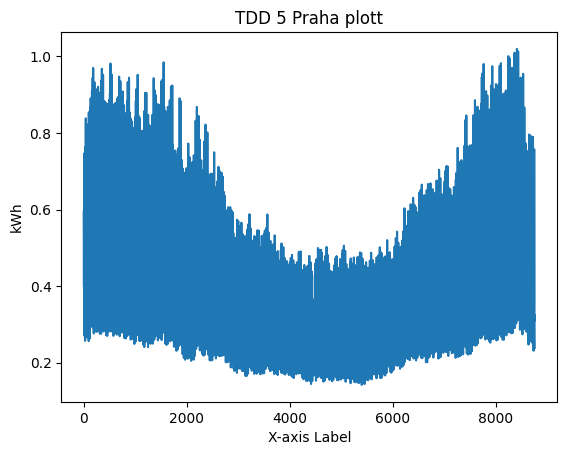

In [22]:
tdd_column = "TDD5\nPraha"
tdd_total = df[tdd_column].sum()

print("Total TDD5 Praha consumption =", tdd_total, "kWh")

tdd_column_data = df[tdd_column]

# Plotting the column
plt.plot(tdd_column_data)
plt.title('TDD 5 Praha plott')
plt.xlabel('X-axis Label')
plt.ylabel('kWh')

# Display the plot
plt.show()

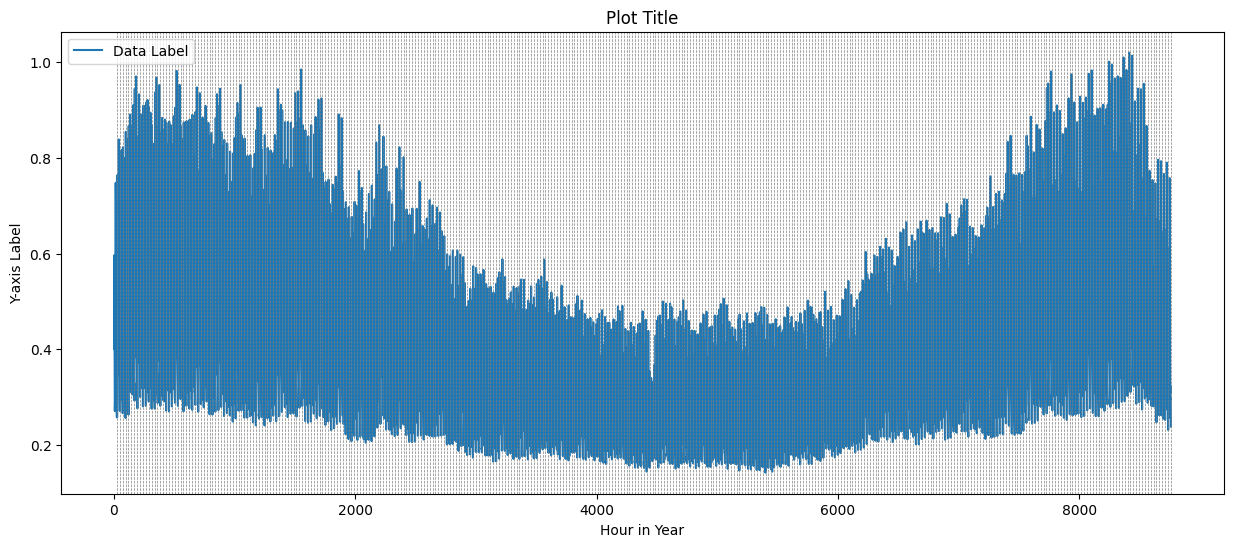

In [25]:
# X-axis data: hours in a year
x_data = np.arange(1, 8761)

# Y-axis data: your column data
y_data = df[tdd_column]  # Replace 'ColumnName' with the name of your column

# Plotting
plt.figure(figsize=(15, 6))  # Adjust the size of the plot as needed
plt.plot(x_data, y_data, label='Data Label')  # Replace 'Data Label' with a suitable label

# Adding vertical lines to delineate between days
for day in range(1, 366):  # 365 days in a year
    plt.axvline(x=day * 24, color='gray', linestyle='--', lw=0.5)

# Adding labels and title
plt.xlabel('Hour in Year')
plt.ylabel('Y-axis Label')  # Replace with your y-axis label
plt.title('Plot Title')  # Replace with your plot title
plt.legend()

# Show the plot
plt.show()

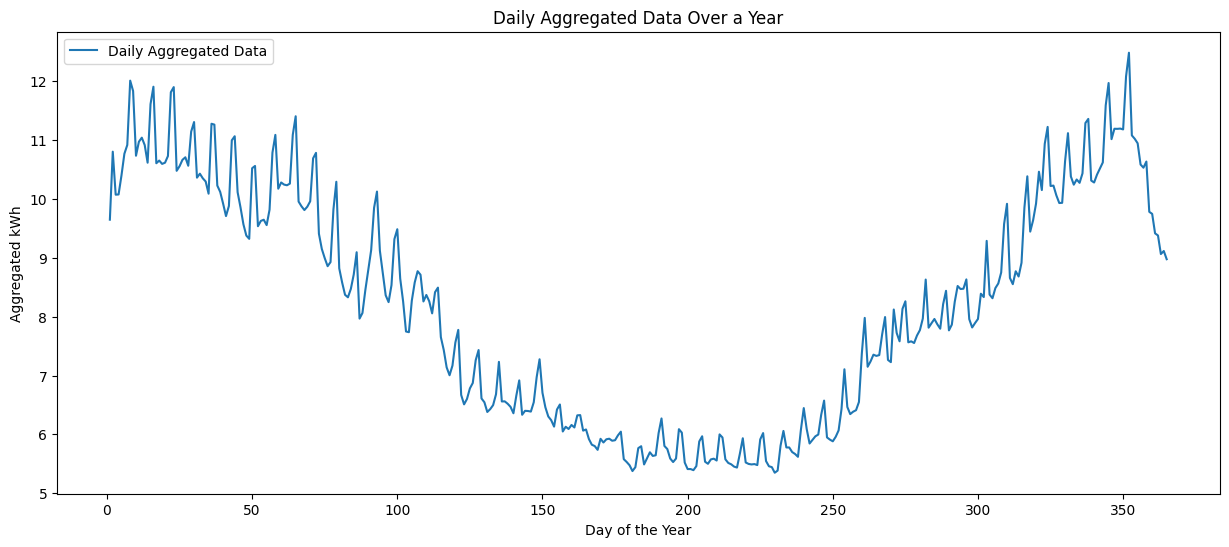

In [27]:
# Assuming 'ColumnName' is the column you want to aggregate
y_data_hourly = df[tdd_column]  # Replace 'ColumnName' with the actual column name

# Reshape the data into 365 days, 24 hours each (assuming it's a non-leap year)
y_data_daily = y_data_hourly.values.reshape(-1, 24).sum(axis=1)

# X-axis data: days in a year
x_data_daily = np.arange(1, 366)

# Plotting
plt.figure(figsize=(15, 6))  # Adjust the size of the plot as needed
plt.plot(x_data_daily, y_data_daily, label='Daily Aggregated Data')
plt.xlabel('Day of the Year')
plt.ylabel('Aggregated kWh')  # Adjust this label as per your data
plt.title('Daily Aggregated Data Over a Year')
plt.legend()

# Show the plot
plt.show()

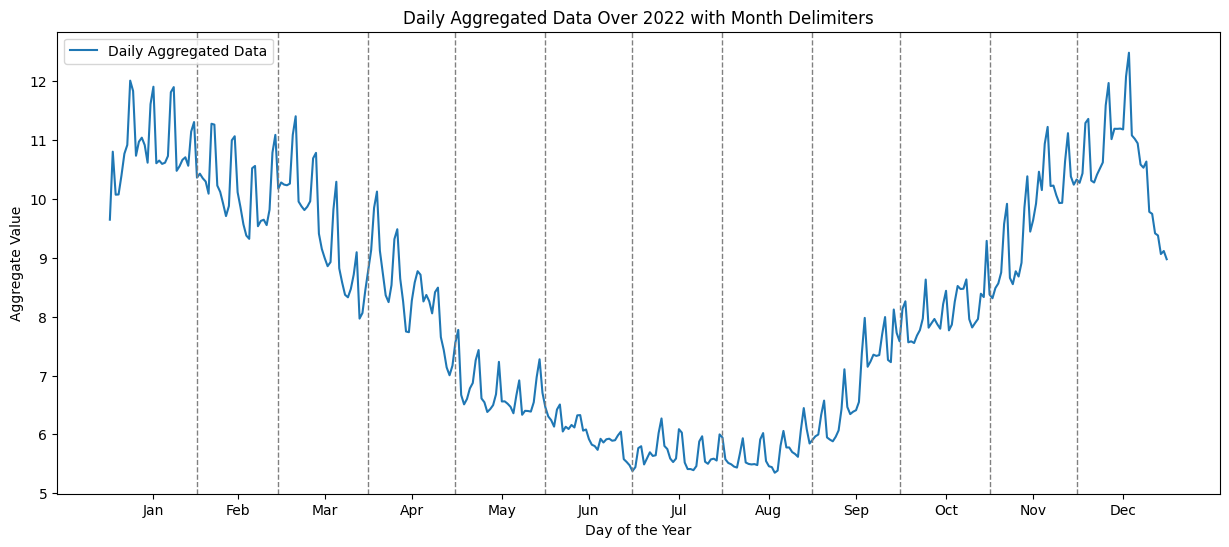

In [38]:
column_name = tdd_column

# Reshaping and summing the data (assumes df[column_name] exists and is the correct column)
y_data_hourly = df[column_name] if column_name in df.columns else np.random.rand(8760)  # Example data
y_data_daily = y_data_hourly.values.reshape(-1, 24).sum(axis=1)

# X-axis data: days in a year
x_data_daily = np.arange(1, 366)

# Days at the start of each month in a non-leap year
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
cumulative_days = np.cumsum(days_per_month)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(x_data_daily, y_data_daily, label='Daily Aggregated Data')

# Adding vertical lines for each month
for day in cumulative_days[:-1]:  # Exclude the last entry (end of the year)
    plt.axvline(x=day, color='gray', linestyle='--', lw=1)

# Adding labels and title
plt.xlabel('Day of the Year')
plt.ylabel('Aggregate Value')  # Adjust as per your data
plt.title('Daily Aggregated Data Over 2022 with Month Delimiters')
plt.xticks(cumulative_days - np.array(days_per_month)//2,  # Positioning the month labels in the middle of the month
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Show the plot
plt.show()

In [39]:
print("Our household consumption was around 10 MWh")
tdd_our = 10000.0
tdd_multiplier = tdd_our / tdd_total
print("Our multipier is", tdd_multiplier)


Our household consumption was around 10 MWh
Our multipier is 3.348376139265987


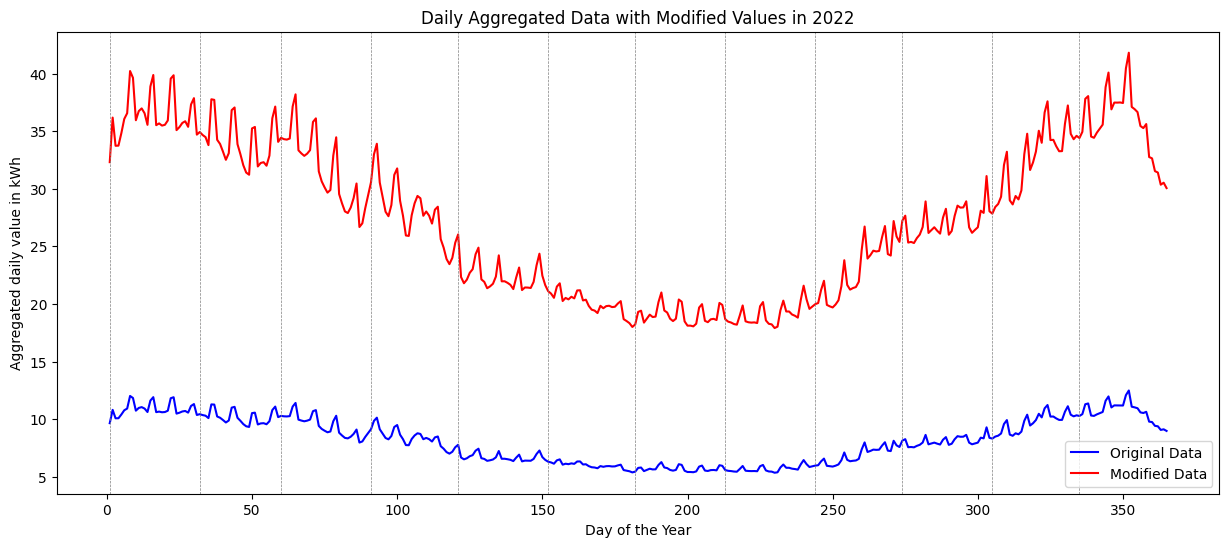

In [40]:
# Assuming 'ColumnName' is the column you want to aggregate
y_data_hourly = df[tdd_column]  # Replace 'ColumnName' with the actual column name

# Reshape the data into 365 days, 24 hours each (assuming it's a non-leap year)
y_data_daily = y_data_hourly.values.reshape(-1, 24).sum(axis=1)

# Modified data: each value multiplied by 3.34
y_data_modified = y_data_daily * tdd_multiplier

# X-axis data: days in a year
x_data_daily = np.arange(1, 366)

# Plotting
plt.figure(figsize=(15, 6))

# Original Data
plt.plot(x_data_daily, y_data_daily, label='Original Data', color='blue')

# Modified Data
plt.plot(x_data_daily, y_data_modified, label='Modified Data', color='red')

# Delimiting months
month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Starts of months in a non-leap year
for month_start in month_starts:
    plt.axvline(x=month_start, color='gray', linestyle='--', lw=0.5)

# Adding labels and title
plt.xlabel('Day of the Year')
plt.ylabel('Aggregated daily value in kWh')
plt.title('Daily Aggregated Data with Modified Values in 2022')
plt.legend()

# Show the plot
plt.show()

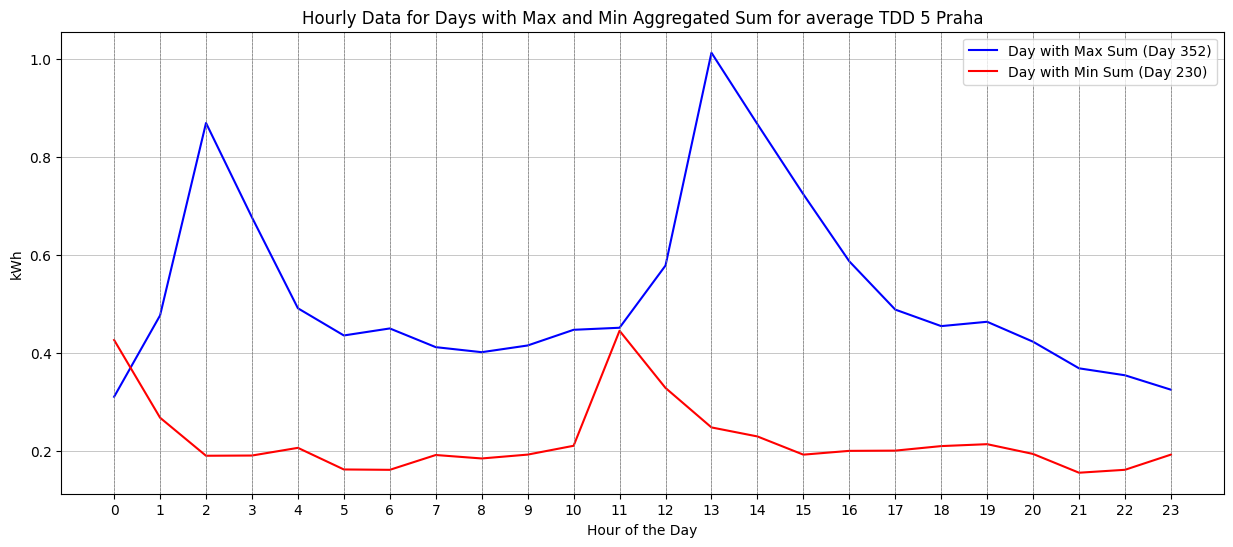

In [44]:
# Assuming 'tdd_column' is the column with the data
y_data_hourly = df[tdd_column]  # Replace 'tdd_column' with the actual column name

# Reshaping the data into days (assuming it's a non-leap year)
y_data_daily = y_data_hourly.values.reshape(-1, 24)

# Calculating the sum for each day
daily_sums = y_data_daily.sum(axis=1)

# Identifying the days with maximal and minimal aggregated sum
max_sum_day_index = daily_sums.argmax()
min_sum_day_index = daily_sums.argmin()

# Extracting hourly data for the max and min sum days
max_sum_day_data = y_data_daily[max_sum_day_index]
min_sum_day_data = y_data_daily[min_sum_day_index]

# Plotting
plt.figure(figsize=(15, 6))

# Hourly data for the day with maximum sum
plt.plot(max_sum_day_data, label=f'Day with Max Sum (Day {max_sum_day_index + 1})', color='blue')

# Hourly data for the day with minimum sum
plt.plot(min_sum_day_data, label=f'Day with Min Sum (Day {min_sum_day_index + 1})', color='red')

# Adding vertical lines for each hour
for hour in range(24):
    plt.axvline(x=hour, color='gray', linestyle='--', lw=0.5)

# Adding labels, title, and legend
plt.xlabel('Hour of the Day')
plt.xticks(range(24))  # Set x-ticks to be every hour
plt.ylabel('kWh')
plt.title('Hourly Data for Days with Max and Min Aggregated Sum for average TDD 5 Praha')
plt.legend()

# Adding a grid
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# Show the plot
plt.show()
